**_NOTE:_** V1_Fruit_type_classifier 

Ml workflow - based on 

1. Looking at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system

# PROJECT STEPS
- Reading the data set and Introduction
- Exploratory Data Analysis with Pandas and NumPy
- Data Preparation using Sklearn
- Selecting and Training a few Machine Learning Models
- Cross-Validation and Hyperparameter Tuning using Sklearn
- eploying the Final Trained Model

## Looking at the big picture:

The problem: Fruits are often hard to classify manually given the wide variety of types, creating an automated classifier could help in the future, so that this task can be done instantly, the proposed dataset : <b> <i> Fruits 360 </i></b> , provides a lot of data to work with.

## Fruit Type Classification

Fruits 360 is a dataset with images of fruits, vegetables, and other plants

In [1]:
# Loading the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input


#matplotlib styles
plt.style.use(['ggplot'])

In [2]:
train_dir = 'data/fruits-360/Training'
test_dir = 'data/fruits-360/Test/'

labels = list(filter(lambda x: os.path.isdir(os.path.join(train_dir, x)), os.listdir(train_dir)))
labels

# Listing all the fruits in the dataset

['Limes',
 'Nut Forest',
 'Apple Granny Smith',
 'Cherry Rainier',
 'Strawberry',
 'Dates',
 'Raspberry',
 'Onion White',
 'Kohlrabi',
 'Pear Kaiser',
 'Tomato not Ripened',
 'Potato White',
 'Pear',
 'Tangelo',
 'Pepino',
 'Lemon Meyer',
 'Apple Red 3',
 'Tamarillo',
 'Cucumber Ripe',
 'Strawberry Wedge',
 'Kumquats',
 'Plum 3',
 'Maracuja',
 'Mangostan',
 'Kaki',
 'Onion Red Peeled',
 'Onion Red',
 'Mango',
 'Rambutan',
 'Pomegranate',
 'Banana Red',
 'Clementine',
 'Peach Flat',
 'Walnut',
 'Kiwi',
 'Pear 2',
 'Cherry Wax Black',
 'Pomelo Sweetie',
 'Potato Sweet',
 'Lychee',
 'Quince',
 'Grapefruit Pink',
 'Chestnut',
 'Pitahaya Red',
 'Tomato Cherry Red',
 'Grape Blue',
 'Pear Williams',
 'Grape White 2',
 'Pepper Orange',
 'Apple Golden 2',
 'Fig',
 'Apple Golden 1',
 'Tomato 2',
 'Pepper Red',
 'Pear Red',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Apple Red Yellow 1',
 'Apple Braeburn',
 'Grape White',
 'Avocado',
 'Salak',
 'Hazelnut',
 'Tomato Maroon',
 'Tomato Yellow',
 'Apple R

In [3]:
print(f"The are: {len(labels)} fruits to classify")

The are: 131 fruits to classify


The folder " meta " contains some extra information on a given fruit , for example :

## Exploratory Data Analysis

Answering a few questions with EDA
- Which fruit is the most common?
- Printing a random fruit for each type

Printing random fruits:

In [4]:
sorted_fruits = sorted(os.listdir(train_dir))
sorted_fruits

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

Now, let's visualize a random image from each of each fruit type:

In [8]:

def print_fruits(rows,cols,  fruit_id = 0):
  sorted_fruits = sorted(os.listdir(train_dir))
  sorted_fruits
  for i in range(rows):
    for j in range(cols):
      try:
        selected_fruit = sorted_fruits[fruit_id] 
        fruit_id += 1
      except:
        break
      if selected_fruit == '.temp_store':
          continue
      food_selected_images = os.listdir(os.path.join(train_dir,selected_fruit)) 
      food_selected_random = np.random.choice(food_selected_images)
      img = plt.imread(os.path.join(train_dir,selected_fruit, food_selected_random))

      ax[i][j].imshow(img)
      ax[i][j].set_title(selected_fruit, pad = 10)

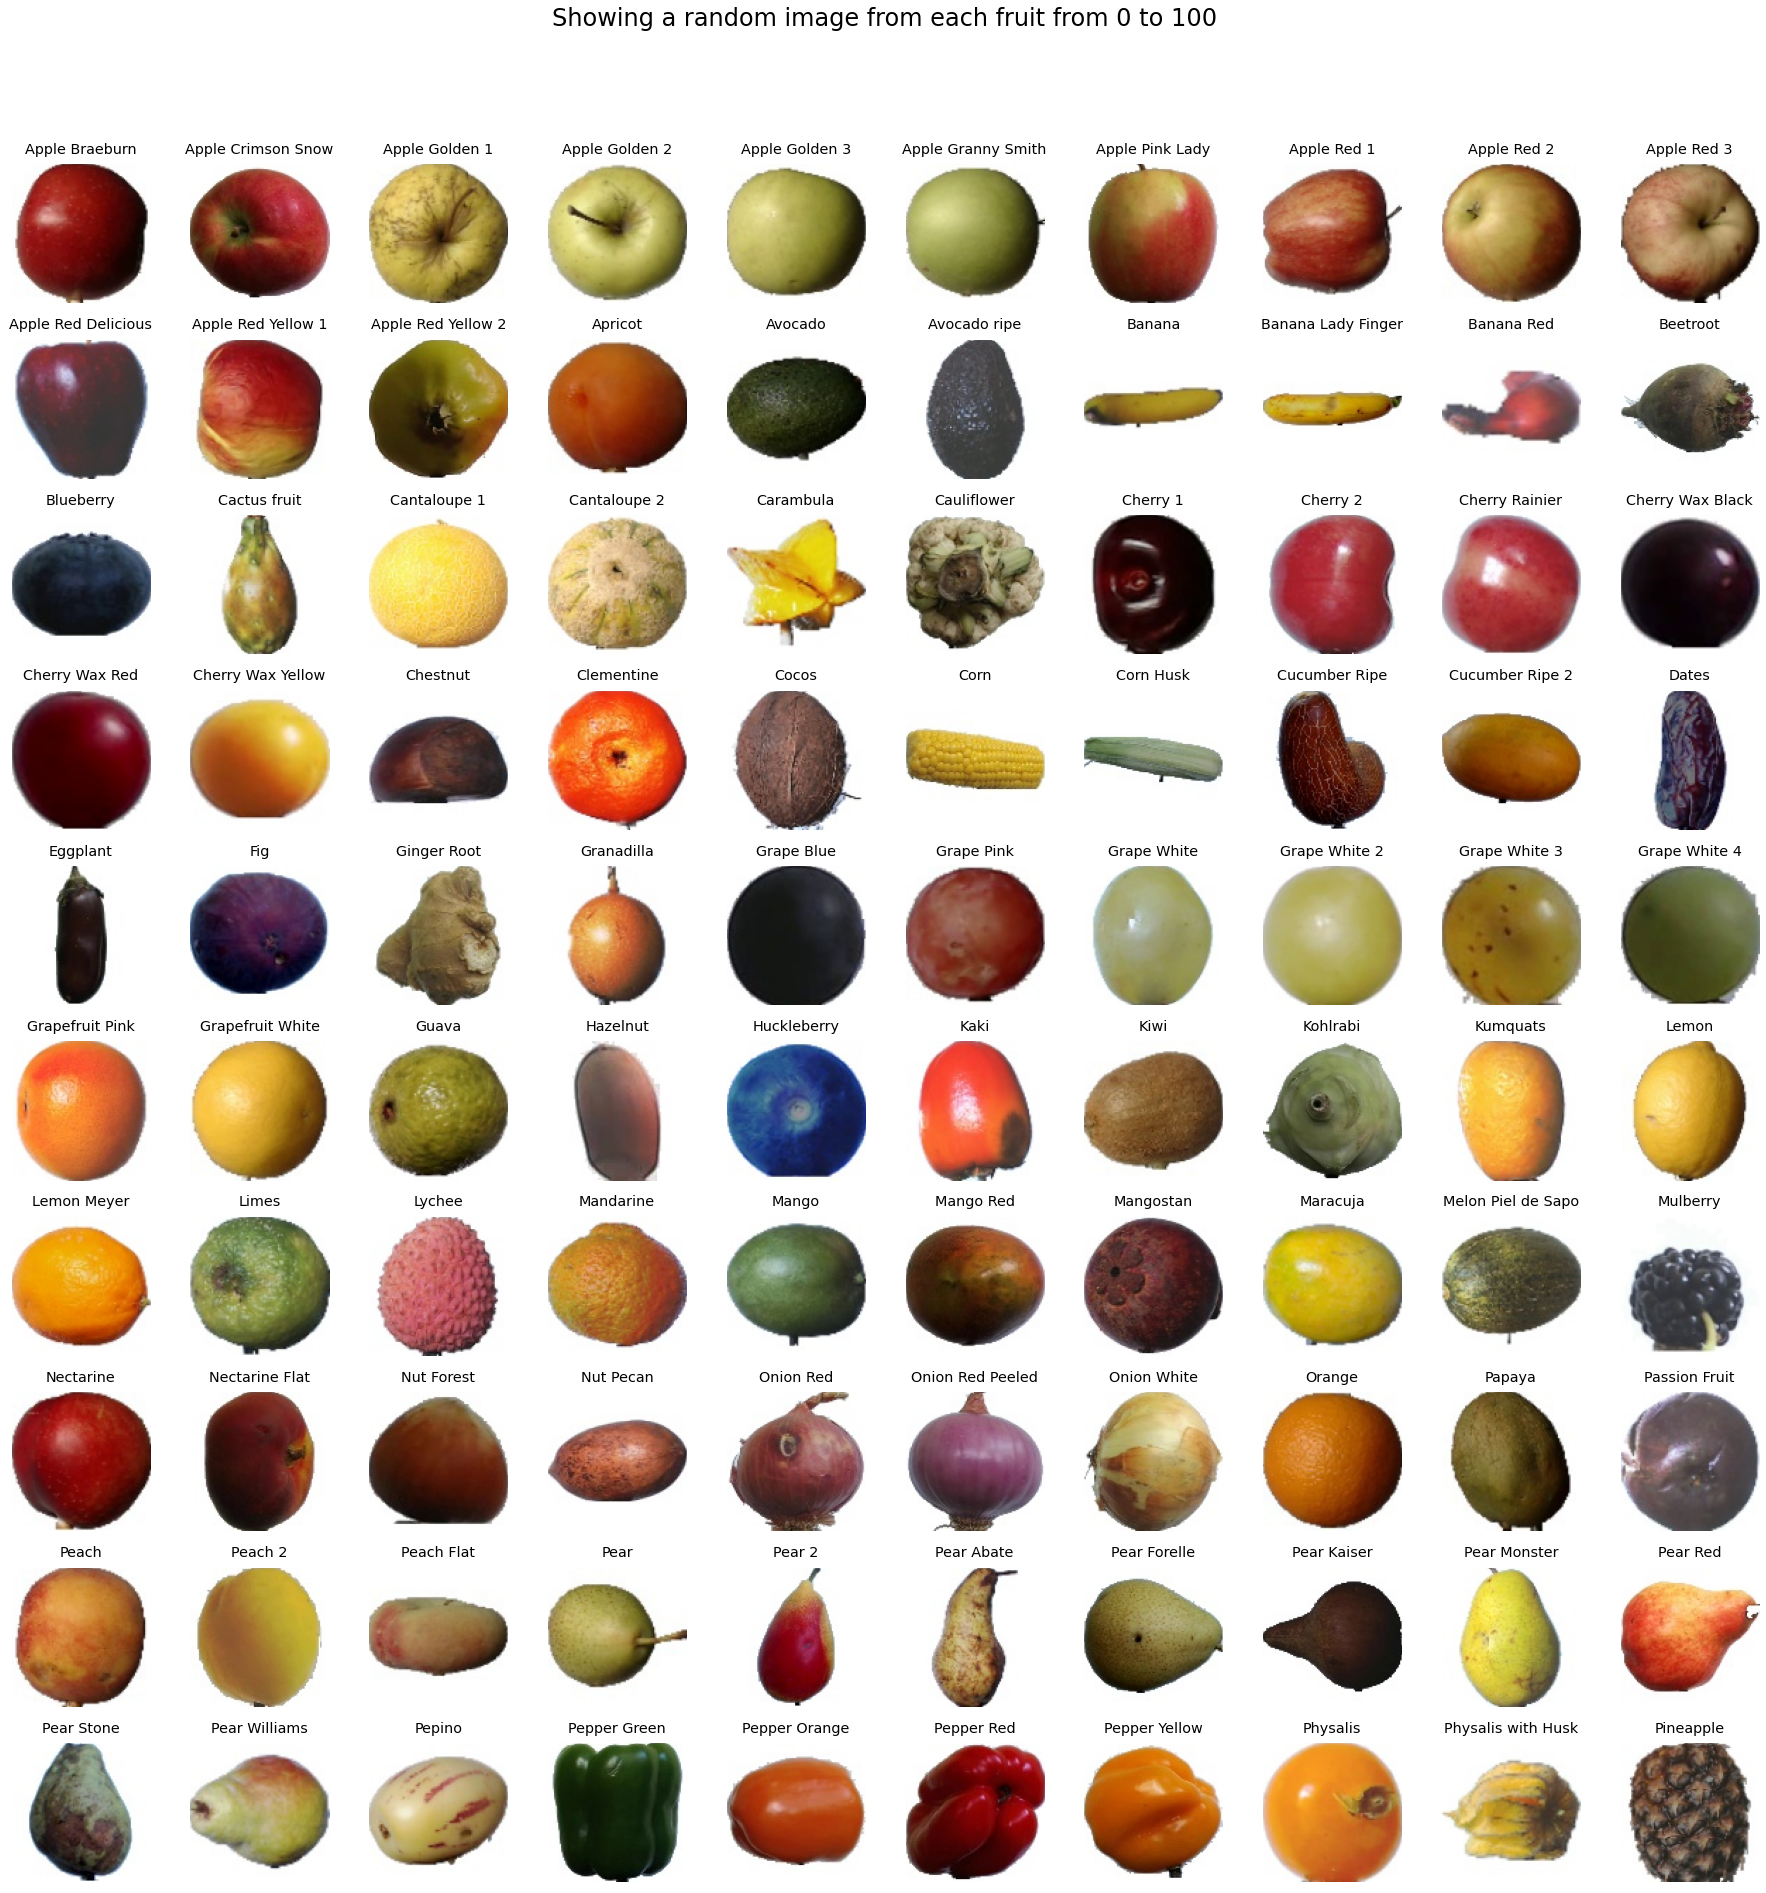

In [9]:
rows = 10
cols = 10
# 10 x 10 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(25,25))

fig.suptitle('Showing a random image from each fruit from 0 to 100',y=1.05,fontsize=24)

print_fruits(rows,cols,0) # start from 0
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html



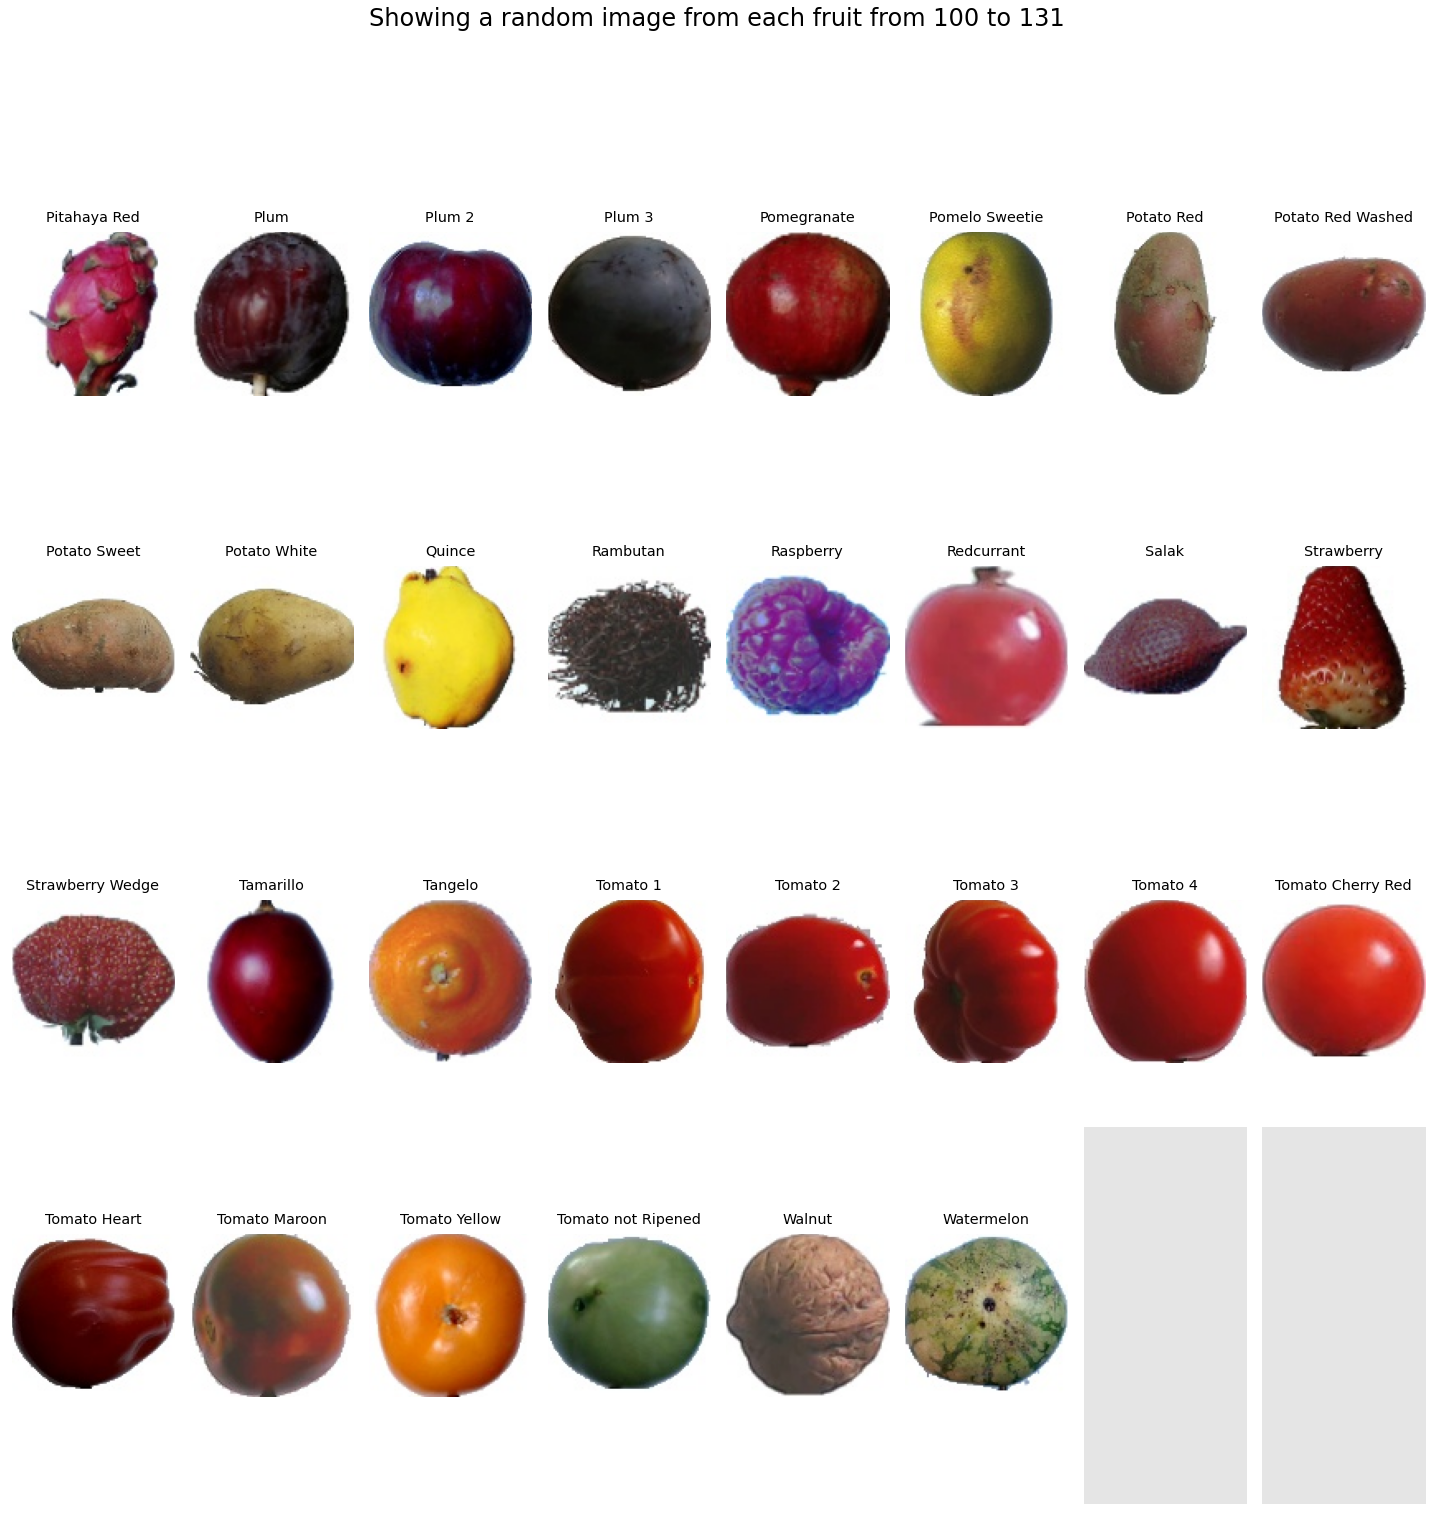

In [10]:
rows = 4
cols = 8
# 10 x 10 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(20,20))

fig.suptitle('Showing a random image from each fruit from 100 to 131',y=1.05,fontsize=24)

print_fruits(rows,cols,101) # start from 101
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


In [6]:
import pandas as pd

## Which fruit is more common ?

In [7]:
train_count = {}
test_count = {}
count_validation = {}
count_total = {}

# 
for fruit in labels:
    train_count[fruit] = len(os.listdir(os.path.join(train_dir,fruit)))
    test_count[fruit] = len(os.listdir(os.path.join(test_dir,fruit)))

count_total['Test'] = test_count
count_total['Training'] = train_count



df = pd.DataFrame.from_dict(count_total)


In [13]:
import seaborn as sns

<AxesSubplot:>

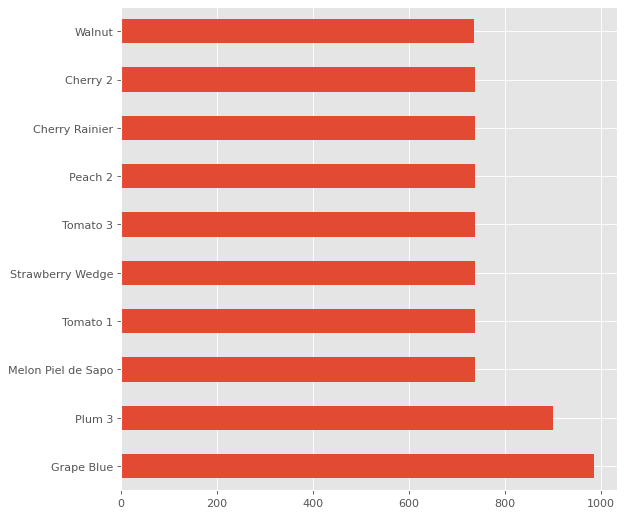

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).head(10).plot(kind='barh')

`Grape Blue` seems to be the fruit with the most data.

<AxesSubplot:>

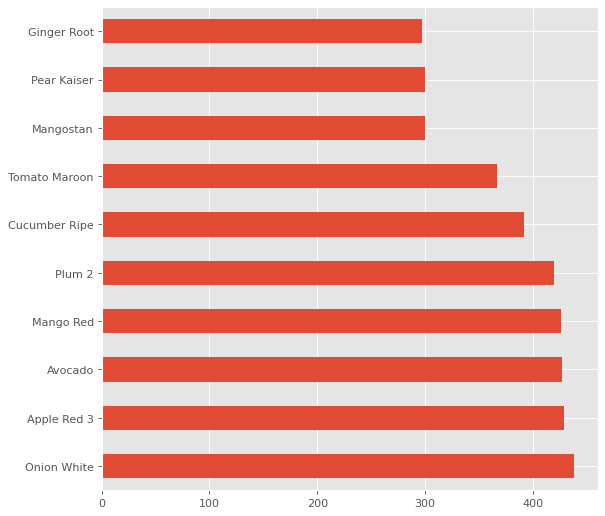

In [15]:

figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).tail(10).plot(kind='barh')




`Ginger Root ` , seems to be the fruit with the least ammount of data.

## Loading the data and Transfer Learning test (XCeption)

## Using ImageDataGenerator to read images

In [96]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    shuffle=True
)

Found 67692 images belonging to 131 classes.


In [9]:
train_ds.class_indices


{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

`Grape Blue` seems to be the fruit with the most data.

In [95]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
)


Found 22688 images belonging to 131 classes.


In [11]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(100, 100, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(131)(vectors)

model = keras.Model(inputs, outputs)


2021-12-08 10:06:53.112108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 10:06:53.187753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 10:06:53.188077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 10:06:53.189642: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

KeyboardInterrupt: 

In [87]:
learning_rate = 0.01
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [ ]:
# history = model.fit(train_ds, epochs=10, validation_data=val_ds)
 

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10))
plt.legend()


NameError: name 'history' is not defined

The model is overfitting quite a bit

In [ ]:
model.save('data/models/')

In [ ]:
model = tf.keras.models.load_model('data/models/')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 21,129,899
Trainable params: 268,419
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
from sklearn.datasets import load_files
model.evaluate(val_ds)

In [ ]:
first_acc = 0.76406031

The non-tuned model of X-ceptionV3 obtained an accuracy of `0.7641`  with the validation dataset, this should be improved with hyperparameter tunning.

## Testing this first dummy model.

We will select a banana inside the test dataset to see what will our model predict:

In [ ]:
path = 'data/fruits-360/Test/Banana/r_63_100.jpg'

In [16]:
from tensorflow.keras.preprocessing.image import load_img


Loading and visualizing the image.

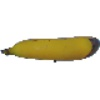

In [ ]:
img = load_img(path, target_size=(100, 100))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 100, 100, 3)

In [ ]:
X = preprocess_input(X)


In [ ]:
pred = model.predict(X)


In [ ]:
d = dict(zip(labels, pred[0]))


In [ ]:
sorted(d.items(), key=lambda x: x[1], reverse=True)


[('Apple Red 3', 224.65305),
 ('Nectarine Flat', 113.45429),
 ('Pepper Red', 96.87196),
 ('Tamarillo', 77.445045),
 ('Banana', 49.403854),
 ('Guava', 36.448696),
 ('Mulberry', 36.407246),
 ('Quince', 27.099348),
 ('Orange', 19.565628),
 ('Pear Stone', 19.347801),
 ('Cactus fruit', 11.953794),
 ('Cauliflower', 11.307524),
 ('Pear 2', 8.811598),
 ('Apricot', 4.128084),
 ('Potato Sweet', -0.22707008),
 ('Pomelo Sweetie', -6.5225115),
 ('Apple Pink Lady', -6.6735673),
 ('Peach', -7.9320874),
 ('Kaki', -10.408901),
 ('Granadilla', -12.15609),
 ('Cocos', -15.288944),
 ('Potato Red Washed', -16.001427),
 ('Pineapple', -16.709055),
 ('Apple Braeburn', -19.3771),
 ('Apple Red Delicious', -20.222733),
 ('Cucumber Ripe', -22.651905),
 ('Pineapple Mini', -24.475502),
 ('Pear Monster', -34.99448),
 ('Potato White', -37.244804),
 ('Redcurrant', -37.739353),
 ('Tomato Cherry Red', -38.4647),
 ('Lychee', -38.87142),
 ('Grape Pink', -39.668285),
 ('Clementine', -40.309547),
 ('Plum 3', -40.638515),
 ('

The model predicts a ` Apple Red 3`, not quite!.
However, the prediction for banana seems to be not so bar off, let's improve the model's performance using hyper-parameter tuning. 

## Visualizing this model with Visualkeras

Within this section I used the visualkeras package to help visualize the CNN more easily, with this tool we can see the model defined in a neat graphical way.

In [5]:
import visualkeras

display: unable to open X server `' @ error/display.c/DisplayImageCommand/411.


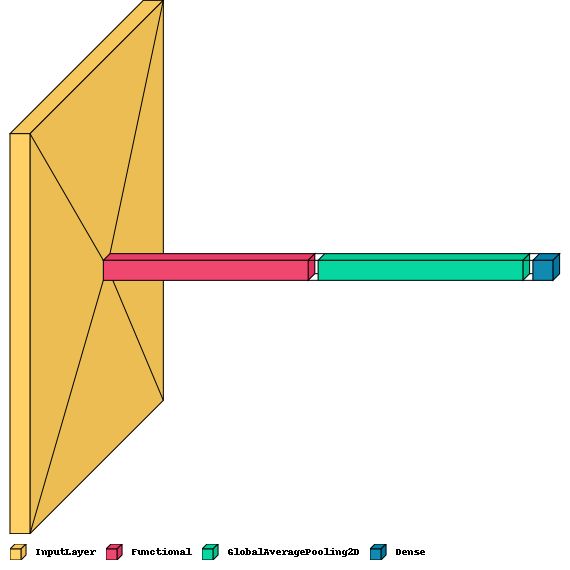

In [ ]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model,legend=True)


- Input Layer :
- Pooling : turning the 3 dimensional into 1D 
- Dense Layer : Turn vectors into predications

## Hyper-parameter tunning (XCeption)

In [88]:
def build_model(alpha=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    base_model.trainable = False

    # actual model 

    inputs = keras.Input(shape=(100, 100, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(131)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [15]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = build_model(alpha=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()


0.0001


2021-12-06 15:54:19.179062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 15:54:19.214478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 15:54:19.214797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 15:54:19.215470: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

NameError: name 'learning_rate' is not defined

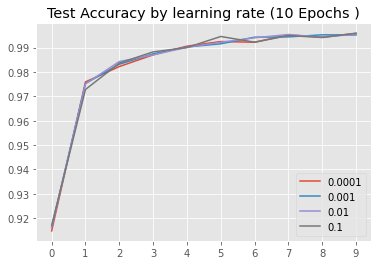

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['accuracy'],label=lr)

plt.title("Test Accuracy by learning rate (10 Epochs )")
plt.xticks(np.arange(10))

plt.legend()

Accuracy on the test dataset seems to be extremely similar across all learning rates.

## Validation dataset

NameError: name 'hist' is not defined

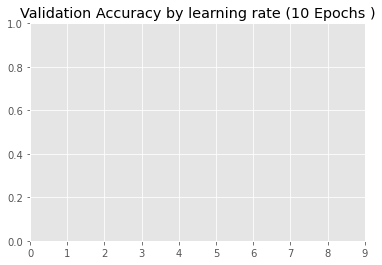

In [16]:
for lr,hist in scores.items():
    plt.plot(hist['val_accuracy'],label=lr)
    
  


plt.title("Validation Accuracy by learning rate (10 Epochs )")
plt.xticks(np.arange(10))

best_score = max(hist['val_accuracy'])
print('lr: ',lr,best_score)

plt.legend()

In [ ]:
(best_score - first_acc) * 100

5.346436155456546

A learning rate of `0.1` got a max score of 0.817 on the `validation` dataset , effectively improving the previous score of 0.7667 by 5.3 %. 
However, the model still seems to be overfitting quite a bit.

## Model Checkpoint

A learning rate of `0.1` seems to be the best one here , let's look on it a bit more , and save the best result using Model Checkpoint.


In [ ]:

model.save_weights('data/models/model_v1.h5',save_format='h5')

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'Xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True, # save best model
    monitor='val_accuracy',
    mode='max'
)

In [18]:
alpha = 0.1

model = build_model(alpha=alpha)

history=model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks = [checkpoint]
)

NameError: name 'learning_rate' is not defined

/tmp/ipykernel_96090/1011488010.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training acc' , color='#8ba000')
/tmp/ipykernel_96090/1011488010.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss' , color='red')
/tmp/ipykernel_96090/1011488010.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')


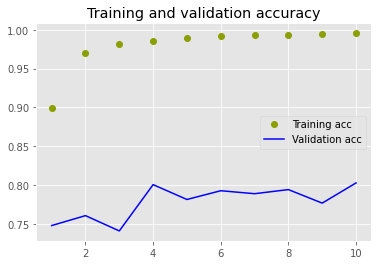

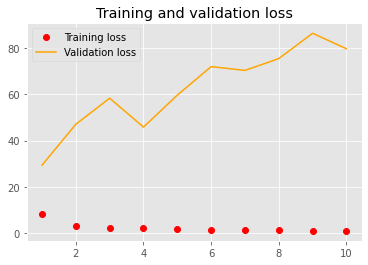

In [ ]:


acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc' , color='#8ba000')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()



plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss' , color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')
plt.title('Training and validation loss')
plt.legend()



plt.show()

The model definitely improved in performance, however the plots seem to indicate overfitting even from the first epochs, this is because this model hasn't used any data augmentation yet, which, in better words from : 
<b>François Chollet's Deep Learning with Python</b>
> is essential for preventing overfitting with small image dataset

Before that, we should experiment adding more layers.

## Adding More Layers

Adding more layers is done to increase the capacity of the network, and it's a classic way of building more powerful recurrent networks.

In [90]:
def make_model(alpha=0.1,size_inner=100):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    base_model.trainable = False

    # actual model 
    inputs = keras.Input(shape=(100, 100, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # add activation function
    

    outputs = keras.layers.Dense(131)(inner)
    
    
    model = keras.Model(inputs, outputs)
    # adding a inner layer

    optimizer = keras.optimizers.RMSprop(learning_rate=alpha)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [43]:
alpha=0.1


score={}

for size in [250,500,1000]:
    print(size)
    model = make_model(alpha=alpha,size_inner=size)
    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    score[size] = history.history
    print()
    print()

250
Epoch 1/10
 233/2116 [==>...........................] - ETA: 44s - loss: 11.1463 - accuracy: 0.0276

KeyboardInterrupt: 

Adding layers doesn't seem to work here, WTF ???.
Let's try adding dropout.

## Adding Dropout and Regularization

In [91]:
def build_model(alpha=0.1, droprate=0.5):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    base_model.trainable = False

    # actual model 
    inputs = keras.Input(shape=(100, 100, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     # adding dropout

    drop = keras.layers.Dropout(droprate)(vectors)

    outputs = keras.layers.Dense(131)(drop)

    
    
    model = keras.Model(inputs, outputs)
    # adding a inner layer

    optimizer = keras.optimizers.RMSprop(learning_rate=alpha)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [51]:
learning_rate = 0.1

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = build_model(
        alpha=learning_rate,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.0
Epoch 1/10
2116/2116 [==============================] - 83s 39ms/step - loss: 8.2480 - accuracy: 0.8987 - val_loss: 34.1689 - val_accuracy: 0.7353
Epoch 2/10
2116/2116 [==============================] - 81s 38ms/step - loss: 3.0204 - accuracy: 0.9699 - val_loss: 46.4868 - val_accuracy: 0.7428
Epoch 3/10
2116/2116 [==============================] - 82s 39ms/step - loss: 2.1911 - accuracy: 0.9819 - val_loss: 57.4593 - val_accuracy: 0.7564
Epoch 4/10
2116/2116 [==============================] - 81s 38ms/step - loss: 2.1812 - accuracy: 0.9848 - val_loss: 57.6671 - val_accuracy: 0.7782
Epoch 5/10
2116/2116 [==============================] - 81s 38ms/step - loss: 1.5841 - accuracy: 0.9894 - val_loss: 65.7895 - val_accuracy: 0.7728
Epoch 6/10
2116/2116 [==============================] - 81s 38ms/step - loss: 1.5893 - accuracy: 0.9910 - val_loss: 68.1224 - val_accuracy: 0.7902
Epoch 7/10
2116/2116 [==============================] - 83s 39ms/step - loss: 1.2608 - accuracy: 0.9930 - val_loss

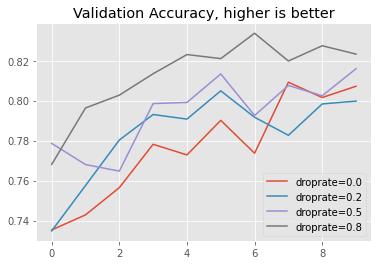

In [63]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate=%s' % droprate))
plt.title("Validation Accuracy, higher is better")
plt.legend()

There is a clear peak in validation accuracy of the model with a `droprate` of 0.8.

In [62]:
for droprate, hist in scores.items():
    plt.plot(hist['val_loss'], label=('droprate=%s' % droprate))
plt.title("Validation Loss, lower is better")
plt.legend()

Validation Loss is also improved for the 0.8 value.

In [92]:
for droprate, hist in scores.items():
    plt.plot(hist['loss'], label=('droprate=%s' % droprate))
plt.title("train Loss, lower is better")
plt.legend()

In [81]:
import warnings


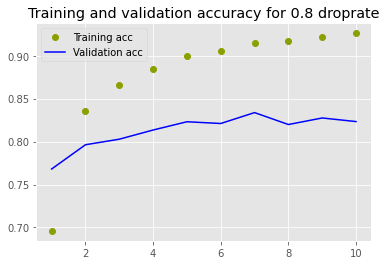

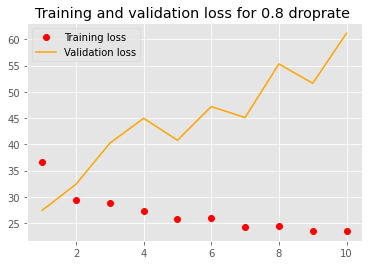

In [90]:
warnings.filterwarnings("ignore")


def display_drop(droprate):
    for droprate, hist in scores.items():
        if(droprate == droprate):
            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']

            val_loss = history.history['val_loss']
            epochs = range(1, len(acc) + 1)

            plt.plot(epochs, acc, 'bo', label='Training acc' , color='#8ba000')
            plt.plot(epochs, val_acc, 'b', label='Validation acc')
            plt.title('Training and validation accuracy for 0.8 droprate')
            plt.legend()
            

            
            plt.figure()
            plt.plot(epochs, loss, 'bo', label='Training loss' , color='red')
            plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')
            plt.title('Training and validation loss for 0.8 droprate ')
            plt.legend()


            plt.show();


display_drop(0.8) 

Even though there's still overfitting, it's as bad as it used to.

However, the loss function values for the train and validation dataset is quite high, and there's quite a big gap between training and validation loss, based on that, it should be better to implement a less higher `droprate`

In [ ]:
display_drop(0.5) 

### 2021-12-06  TODO : 
- Checkpoint the model ✔️
- dropout ✔️



In [6]:
import datetime
from datetime import date


today = date.today() + datetime.timedelta(days=1)
print("Tomorrow' date:", today)


# data augmentation. TODO
# - Add another model :TODO


Tomorrow' date: 2021-12-08


### 2021-12-07  TODO : 
- data augmentation. TODO
- Add another model :TODO


## Data Augmentation

In [20]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img



In [82]:

# Apply the augmentations on the TRAIN dataset only
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,

        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,

)





In [30]:
# loading an example image to visualize the data augmentation

img= load_img(train_dir+'/Apple Braeburn/0_100.jpg')
X = img_to_array(img)
X = X.reshape((1,) + X.shape) # img shape (1,3,100,100)



i = 0
for batch in train_datagen.flow(X, batch_size=1,
                          save_to_dir='data/fruits-360/preview/', save_prefix='apple', save_format='jpeg'):
    i += 1
    if i > 20:
        break  


In [39]:

# modules necessary for loading the preview data augmentated images
from ThreadedFileLoader.ThreadedFileLoader import *
from mpl_toolkits.axes_grid1 import ImageGrid


In [41]:
instance = ThreadedImageLoader("data/fruits-360/preview/*.jpeg")
instance.start_loading()
images = instance.loaded_objects

data/fruits-360/preview/apple_0_1507.jpeg
data/fruits-360/preview/apple_0_5839.jpeg
data/fruits-360/preview/apple_0_4012.jpeg
data/fruits-360/preview/apple_0_1852.jpeg
data/fruits-360/preview/apple_0_9652.jpeg
data/fruits-360/preview/apple_0_4583.jpeg
data/fruits-360/preview/apple_0_7839.jpeg
data/fruits-360/preview/apple_0_6541.jpeg
data/fruits-360/preview/apple_0_6305.jpeg
data/fruits-360/preview/apple_0_5309.jpeg
data/fruits-360/preview/apple_0_8870.jpeg
data/fruits-360/preview/apple_0_9059.jpeg
data/fruits-360/preview/apple_0_3346.jpeg
data/fruits-360/preview/apple_0_4318.jpeg
data/fruits-360/preview/apple_0_2488.jpeg
data/fruits-360/preview/apple_0_7532.jpeg
data/fruits-360/preview/apple_0_4006.jpeg
data/fruits-360/preview/apple_0_4884.jpeg
data/fruits-360/preview/apple_0_4149.jpeg
data/fruits-360/preview/apple_0_8682.jpeg
data/fruits-360/preview/apple_0_6594.jpeg


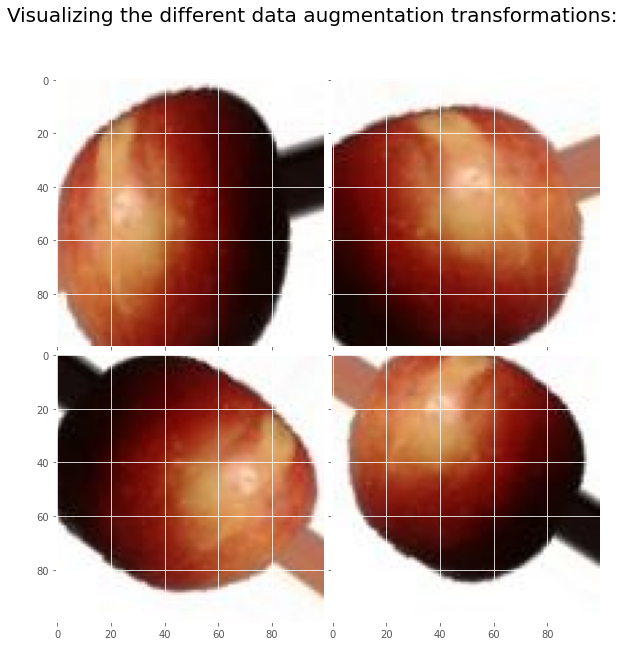

In [58]:
fig = plt.figure(figsize=(10., 10.))
fig.suptitle("Visualizing the different data augmentation transformations:  ", fontsize = 20)

grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2
                 , 2),
                 axes_pad=0.1,
                 )

for ax, im in zip(grid, images):
    ax.imshow(im)
plt.show()

In [84]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_ds_aug = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(100, 100),
                    batch_size=32,
                    class_mode='categorical')


Found 67692 images belonging to 131 classes.


# COLAB only code

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! kaggle datasets download moltean/fruits

In [ ]:
! unzip fruits.zip

In [83]:
val_ds_aug = test_datagen.flow_from_directory(
test_dir,
target_size=(100, 100),
batch_size=32,
class_mode='categorical')

Found 22688 images belonging to 131 classes.


In [97]:
alpha = 0.1
droprate = 0.5 # defined drop rate

model = build_model(
    alpha=alpha,
    droprate=droprate
)

history = model.fit(train_ds_aug, epochs=30, validation_data=val_ds_aug,verbose=2)


Epoch 1/30


Curiously, this kind of data augmentations seems not to improve the performance that much, let's try something else.


In [ ]:
# TODO : VGGNet-16
# Model Comparasions 
# Model Testing with multiple_fruits
# Model Deployment with TF-Lite
# Front end web ap
